In [70]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation,rc,cm
from IPython.display import HTML

In [19]:
def Mat_A_inv(Nx,Ny,r):
    # Ojo Nx,Ny se refiere a los pintos interiores
    N_tot = Nx*Ny
    A = zeros( (N_tot,N_tot) )
    dd , m_r= 1+4*r , -r
    # Psi_ij -> i renglones o y, j columnas o x
    for i in range(Ny-1):
        for j in range(Nx-1):
            A[Ny*i+j,Ny*i+j] = dd
            A[Ny*i+j,Ny*i+j+1] = m_r
            A[Ny*i+j+1,Ny*i+j] = m_r
            A[Ny*i+j,Ny*(i+1)+j] = m_r
            A[Ny*(i+1)+j,Ny*i+j] = m_r
    for j in range(Nx-1):
        A[Ny*(Ny-1)+j,Ny*(Ny-1)+j] = dd
        A[Ny*(Ny-1)+j,Ny*(Ny-1)+j+1] = m_r
        A[Ny*(Ny-1)+j+1,Ny*(Ny-1)+j] = m_r
    for i in range(Ny-1):
        A[Ny*i+Nx-1,Ny*i+Nx-1] = dd
        A[Ny*i+Nx-1,Ny*(i+1)+Nx-1] = m_r
        A[Ny*(i+1)+Nx-1,Ny*i+Nx-1] = m_r
    A[Ny*(Ny-1)+Nx-1,Ny*(Ny-1)+Nx-1] = dd
    A_inv = inv(A)
    return A_inv

def Mat_B(Nx,Ny,r):
    # Ojo Nx,Ny se refiere a los pintos interiores
    N_tot = Nx*Ny
    A = zeros( (N_tot,N_tot) )
    dd = 1-4*r 
    # Psi_ij -> i renglones o y, j columnas o x
    for i in range(Ny-1):
        for j in range(Nx-1):
            A[Ny*i+j,Ny*i+j] = dd
            A[Ny*i+j,Ny*i+j+1] = r
            A[Ny*i+j+1,Ny*i+j] = r
            A[Ny*i+j,Ny*(i+1)+j] = r
            A[Ny*(i+1)+j,Ny*i+j] = r
    for j in range(Nx-1):
        A[Ny*(Ny-1)+j,Ny*(Ny-1)+j] = dd
        A[Ny*(Ny-1)+j,Ny*(Ny-1)+j+1] = r
        A[Ny*(Ny-1)+j+1,Ny*(Ny-1)+j] = r
    for i in range(Ny-1):
        A[Ny*i+Nx-1,Ny*i+Nx-1] = dd
        A[Ny*i+Nx-1,Ny*(i+1)+Nx-1] = r
        A[Ny*(i+1)+Nx-1,Ny*i+Nx-1] = r
    A[Ny*(Ny-1)+Nx-1,Ny*(Ny-1)+Nx-1] = dd
    return A

In [20]:
A_inv = Mat_A_inv(3,3,1)
B = Mat_B(3,3,1)

In [21]:
def Psi_interior(Psi):
    Ny,Nx = Psi.shape
    Nx_int , Ny_int = Nx-2 , Ny-2
    Psi_vec = Psi[1:-1,1:-1].reshape(1,Nx_int*Ny_int)
    return Nx_int,Ny_int,Psi_vec[0]

def cond_ini_1(x,y):
    Nx_tot , Ny_tot = len(x),len(y)
    Psi_ini = zeros( (Ny_tot,Nx_tot) )
    for i in range(Nx_tot):
        for j in range(Ny_tot):
            if sqrt((x[i]-0.25)**2 + (y[j]-0.25)**2) < 0.1:
                Psi_ini[j,i] = 1
            if sqrt((x[i]-0.75)**2 + (y[j]-0.75)**2) < 0.15:
                Psi_ini[j,i] = 1
    return Psi_ini

In [22]:
x , y = linspace(0,1,50) , linspace(0,1,50)
Psi_ini = cond_ini_1(x,y)

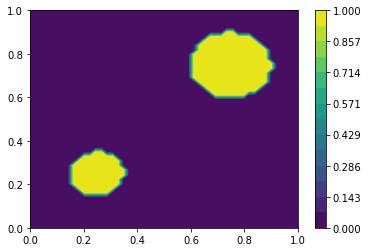

In [23]:
fig , ejes = subplots()
niveles = linspace(0,1,15)
XX,YY = meshgrid(x,y)
graf = ejes.contourf(XX,YY,Psi_ini,levels=niveles)
fig.colorbar(graf)
show()

In [24]:
def valor_r(x,y,t,D=1):
    delta_t , delta_x , delta_y = t[1]-t[0] , x[1]-x[0] , y[1]-y[0]
    if delta_x == delta_y:
        r = 0.5*D*delta_t/(delta_x*delta_y)
        if r > 1:
            print('Ojo! no hay convergencia porque r>1')
        else:
            return r
    else:
        print('La malla no es uniforme \U0001F92E')

In [25]:
Nx,Ny,Psi_ini_interior = Psi_interior(Psi_ini)
t = arange(0,0.05,0.0005)
r = valor_r(x,y,t)
r,len(t)

(0.6002500000000002, 100)

In [26]:
A_inv , B = Mat_A_inv(Nx,Ny,r) , Mat_B(Nx,Ny,r)
Mat_evol = dot(A_inv,B)

In [27]:
Psi_final = zeros_like(Psi_ini)
Psi_final_interior = zeros_like(Psi_ini_interior)
Psi_final_interior = dot(Mat_evol,Psi_ini_interior)
for i in range(len(t)-1):
    Psi_final_interior = dot(Mat_evol,Psi_final_interior)
Psi_final[1:-1,1:-1] = Psi_final_interior.reshape(Nx,Ny)

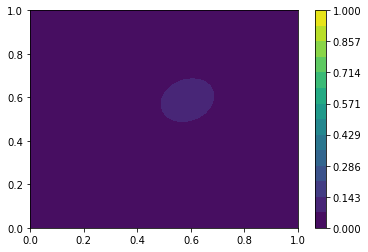

In [28]:
fig , ejes = subplots()
graf = ejes.contourf(XX,YY,Psi_final,levels=niveles)
fig.colorbar(graf)
show()

In [29]:
def CN_2D(Psi_ini,x,y,t,D=1):
    # Ojo Psi_ini tiene los punto de la frontea
    Nx,Ny,Psi_ini_interior = Psi_interior(Psi_ini)
    r = valor_r(x,y,t)
    A_inv , B = Mat_A_inv(Nx,Ny,r) , Mat_B(Nx,Ny,r)
    Mat_evol = dot(A_inv,B)
    #
    Psi_final = zeros_like(Psi_ini)
    Psi_final_interior = zeros_like(Psi_ini_interior)
    Psi_final_interior = dot(Mat_evol,Psi_ini_interior)
    for i in range(len(t)-1):
        Psi_final_interior = dot(Mat_evol,Psi_final_interior)
    Psi_final[1:-1,1:-1] = Psi_final_interior.reshape(Nx,Ny)
    return Psi_final

In [30]:
x , y , t = linspace(0,1,50) , linspace(0,1,50) , arange(0,0.05,0.0005)
Psi1 = cond_ini_1(x,y)
Psif1 = CN_2D(Psi1,x,y,t)

/var/folders/18/578bmq497474x5l7rkl76k7h0000gn/T/ipykernel_14637/3582552525.py:6: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(graf_ini)


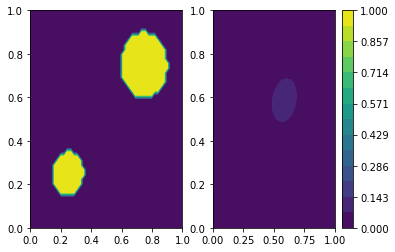

In [31]:
fig , ejes = subplots(1,2)
niveles = linspace(0,1,15)
XX,YY = meshgrid(x,y)
graf_ini = ejes[0].contourf(XX,YY,Psi1,levels=niveles)
graf_final = ejes[1].contourf(XX,YY,Psif1,levels=niveles)
fig.colorbar(graf_ini)
show()

In [35]:
def CN_2D_total(Psi_ini,x,y,t,D=1):
    # Ojo Psi_ini tiene los punto de la frontea
    Nx,Ny,Psi_ini_interior = Psi_interior(Psi_ini)
    r = valor_r(x,y,t)
    A_inv , B = Mat_A_inv(Nx,Ny,r) , Mat_B(Nx,Ny,r)
    Mat_evol = dot(A_inv,B)
    #
    Nxt,Nyt = Psi_ini.shape
    Psi_xy_t = zeros((Nxt,Nyt,len(t))) #Esta es la variable con todas las soluciones
    Psi_xy_t[:,:,0] = Psi_ini
    Psi_final_interior = zeros_like(Psi_ini_interior)
    Psi_final_interior = dot(Mat_evol,Psi_ini_interior)
    Psi_xy_t[1:-1,1:-1,1] = Psi_final_interior.reshape(Nx,Ny)
    for i in range(len(t)-2):
        Psi_final_interior = dot(Mat_evol,Psi_final_interior)
        Psi_xy_t[1:-1,1:-1,i+2] = Psi_final_interior.reshape(Nx,Ny)
    return Psi_xy_t

In [52]:
x , y , t = linspace(0,1,100) , linspace(0,1,100) , arange(0,0.025,0.0001)
Psi2= cond_ini_1(x,y)
Psif2 = CN_2D_total(Psi2,x,y,t)

/var/folders/18/578bmq497474x5l7rkl76k7h0000gn/T/ipykernel_14637/2756498166.py:6: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(graf_ini)


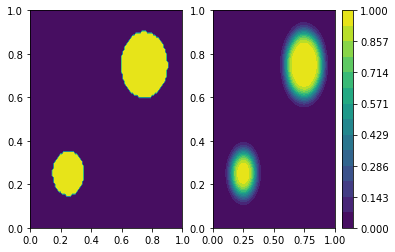

In [53]:
fig , ejes = subplots(1,2)
niveles = linspace(0,1,15)
XX,YY = meshgrid(x,y)
graf_ini = ejes[0].contourf(XX,YY,Psif2[:,:,0],levels=niveles)
graf_final = ejes[1].contourf(XX,YY,Psif2[:,:,5],levels=niveles)
fig.colorbar(graf_ini)
show()

In [54]:
%%capture
fig = figure(figsize=(5,5))
ejes = fig.add_subplot()
ejes.set_xlim((0,1)),ejes.set_ylim((0,1))
ejes.set_aspect('equal')

niveles = linspace(0,1,15)
XX,YY = meshgrid(x,y)

def mi_peli(i,ejes,fig):
    ejes.cla()
    grafica = (ejes.contourf(XX,YY,Psif2[:,:,i],levels=niveles))
    return grafica

pelicula = animation.FuncAnimation(fig,mi_peli,frames=len(t),fargs=(ejes,fig),interval=150)

In [55]:
HTML(pelicula.to_html5_video())

In [96]:
%%capture
fig = figure(figsize=(8,4),dpi=200)

ejes1 = fig.add_subplot(1,2,1)
ejes1.set_xlim((0,1)),ejes.set_ylim((0,1))
ejes1.set_aspect('equal')

ejes2 = fig.add_subplot(1,2,2,projection='3d')
ejes2.set_xlim((0,1)),ejes2.set_ylim((0,1)),ejes2.set_zlim((0,1))

ejes2.view_init(30,30)

def mi_peli(i,ejes1,ejes2,fig):
    ejes1.cla(),ejes2.cla()
    grafica = (ejes1.contourf(XX,YY,Psif2[:,:,i],levels=niveles),
              ejes2.plot_surface(XX,YY,Psif2[:,:,i],
                                 linewidth=0,
                                 antialiased=False,
                                 cmap=cm.rainbow) )
    ejes2.set_zlim((0,1))
    ejes2.view_init(30,30+i)
    return grafica

pelicula = animation.FuncAnimation(fig,mi_peli,
                                   frames=100,
                                   fargs=(ejes1,ejes2,fig),
                                   interval=150)

In [97]:
HTML(pelicula.to_html5_video())